# BeautifulSoup Tutorial 

In [1]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [3]:
soup.title

<title>The Dormouse's story</title>

In [4]:
soup.title.name

'title'

In [5]:
soup.title.parent.name

'head'

In [6]:
soup.p

<p class="title"><b>The Dormouse's story</b></p>

In [7]:
soup.p['class']

['title']

In [8]:
soup.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [9]:
soup.find_all('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [10]:
soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [11]:
soup.find(id='link3')

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

## Common task 1: is to extract all URL found in a page

In [12]:
for link in soup.find_all('a'):
    print(link.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


## Common task 2: Extract all text from a page

In [13]:
print(soup.get_text())

The Dormouse's story

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



## Best practice tip: Use lxml's HTML parser
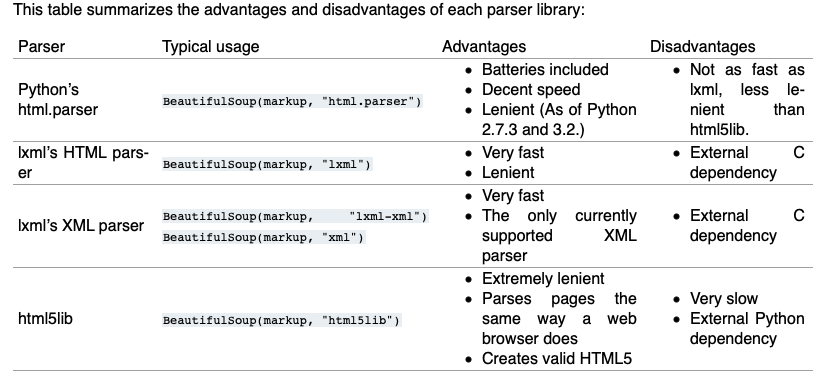

## Open a document/ Making the soup
To parse a document, pass into the bs4 constructor. You can pass in a string or open a file handle

In [24]:
# with open("index.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')

soup = BeautifulSoup("<html>a web page</html>", 'html.parser')
soup.find_all("html")

[<html>a web page</html>]

In [25]:
print(soup)

<html>a web page</html>


In [28]:
print(BeautifulSoup("<html><head></head><body>Sacr&eacute; bleu!</body></html>")) # uses html.parser by default

<html><head></head><body>Sacré bleu!</body></html>


## Kinds of objects

Beautfulsoup transforms a complex HTML document into python objects. 

4 kinds of objects:

1. Tag
2. NavigablString
3. BeautifulSoup, and 
4. Comment

# 1. Tag
Corresponds to an HTML or XML tag in the original document

Tags have a lot of attributes and methods. Most will be covered in Navigating the tree and Searching the tree


In [46]:
soup = BeautifulSoup('<h1></h1><b class="boldest">Extremely bold</b>', 'html.parser')
tag = soup.b
type(tag)

bs4.element.Tag

In [47]:
soup.b.name
tag.name

'b'

In [48]:
soup.b.name = "blockquote"

In [49]:
tag

<blockquote class="boldest">Extremely bold</blockquote>

In [50]:
soup

<h1></h1><blockquote class="boldest">Extremely bold</blockquote>

### Attributes
A tag may have any number of attributes. The tag <b id="boldest"> has an attribute “id” whose value is “boldest”. 

In [51]:
tag = BeautifulSoup('<b id="boldest">bold</b>', 'html.parser').b
tag['id']

'boldest'

In [52]:
tag.attrs

{'id': 'boldest'}

In [53]:
tag['id'] = 'verybold'
tag['another-attribute'] = 1
tag

<b another-attribute="1" id="verybold">bold</b>

In [54]:
tag.attrs

{'id': 'verybold', 'another-attribute': 1}

### Best practice tip: Use .get() to avoid KeyError

In [55]:
tag['id']

'verybold'

In [56]:
tag.get('id')

'verybold'

In [57]:
del tag['id']

In [58]:
tag['id']

KeyError: 'id'

In [61]:
print(tag.get('id'))

None


### Multi valued attributes (e.g class="body strikeout">)
The most common multi-valued attribute is class (that is, a tag can have more than one CSS class). 
- class

Others include :
- rel, 
- rev, 
- accept-charset, 
- headers, and 
- accesskey. Beautiful Soup presents the value(s) of a multi-valued attribute as a list:

In [62]:
css_soup = BeautifulSoup('<p class="body"></p>', 'html.parser')
css_soup

<p class="body"></p>

In [66]:
css_soup.p.get('class') # single valued

['body']

In [67]:
css_soup = BeautifulSoup('<p class="body strikeout"></p>', 'html.parser')

In [72]:
css_soup.p.get('class') # Multivalued. Returns values aas list

['body', 'strikeout']

In [73]:
id_soup = BeautifulSoup('<p id="my id"></p>', 'html.parser') # id is not a multivalued attribute
id_soup.p.get('id')

'my id'

In [74]:
rel_soup = BeautifulSoup('<p>Back to the <a rel="index">homepage</a></p>', 'html.parser') 
rel_soup

<p>Back to the <a rel="index">homepage</a></p>

In [77]:
rel_soup.a.get('rel')

['index']

In [79]:
rel_soup.a['rel'] = ['index', 'contents'] 

In [80]:
print(rel_soup.p)

<p>Back to the <a rel="index contents">homepage</a></p>


In [83]:
# multi_valued_attributes=None prevents multi values for attributes
no_list_soup = BeautifulSoup('<p class="body strikeout"></p>', 'html.parser', multi_valued_attributes=None)
no_list_soup.p['class']

'body strikeout'

### To guarantee you get a list whether or not it's a multi-valued attribute


In [84]:
id_soup = BeautifulSoup('<p id="my id"></p>', 'html.parser') # id is not a multi valued attribute
id_soup.p['id']
# 'my id'

'my id'

In [85]:
id_soup.p.get_attribute_list('id')

['my id']

In [87]:
xml_soup = BeautifulSoup('<p class="body strikeout"></p>', 'xml') # if you parse document as xml, there are no multi valued attributes
xml_soup.p['class']

'body strikeout'

#### XML was designed to carry data - with focus on what data is
#### HTML was designed to display data - with focus on how data looks

In [88]:
class_is_multi= { '*' : 'class'}
xml_soup = BeautifulSoup('<p class="body strikeout"></p>', 'xml', multi_valued_attributes=class_is_multi) # to make XML understand multivalued attributes
xml_soup.p['class']

['body', 'strikeout']

# 2. NavigableString
A string corresponds to a bit of text within a tag. BeautifulSoup uses NavigableString class to obtain these bits of text

In [89]:
soup = BeautifulSoup('<b class="boldest">Extremely bold</b>', 'html.parser')
tag = soup.b
tag.string

'Extremely bold'

In [91]:
type(tag.string) #NavigableString

bs4.element.NavigableString

A NavigableString is just like a Python Unicode string except that it also supports some of the features described in Navigating the tree and Searching the tree. You can convert NavigableString to Unicode string with str()

In [95]:
unicode_string = str(tag.string)
unicode_string # 'Extremely bold'
type(unicode_string)

str

In [96]:
tag.string.replace_with("No longer bold") # you cant edit in place but you can replace string with another

'Extremely bold'

#### Usage Tip: 
If you want to use a NavigableString outside of Beautiful Soup, you should call unicode() on it to turn it into a normal Python Unicode string. If you don’t, your string will carry around a reference to the entire Beautiful Soup parse tree, even when you’re done using Beautiful Soup. This is a big waste of memory.

# 3. BeautifulSoup
The BeautifulSoup object represents the parsed document as a whole. For most purposes, you can trat it as a Tag object. This means it supports most of the methosd described in Navigating the tree and Searching the tree

You can also pass a BeautifulSoup object into one of the methods defined in Modifying the tree, just as you would a Tag

In [99]:
doc = BeautifulSoup("<document><content/>INSERT FOOTER HERE</document", "xml")
doc

<?xml version="1.0" encoding="utf-8"?>
<document><content/>INSERT FOOTER HERE</document>

In [100]:
footer = BeautifulSoup("<footer>Here's the footer</footer>", "xml")
footer

<?xml version="1.0" encoding="utf-8"?>
<footer>Here's the footer</footer>

In [101]:
soup.name

'[document]'

# 4. Comments and Special strings
Tag, NavigableString, and BeautfiulSoup cover almost everything youll see in an HTML or XML file, but there are a few leftover bits... Comment

In [114]:
markup = "<b><!--Hey, buddy. Want to buy a used parser?--></b>"
soup = BeautifulSoup(markup, 'html.parser')
# tag = soup.b
comment = soup.b.string
type(comment)

bs4.element.Comment

In [115]:
comment

'Hey, buddy. Want to buy a used parser?'

Beautifulsoup defines classes called 

- Stylesheet : for embedded CSS stylesheets (any strings found inside a <style> tag), 
- Script : for embedded Javascript (any strings found in a <script> tag),
- TemplateString : HTML tmeplates (any strings found in a <template> tag).
    
Theses classes work exactly the same way as NavigaableString. Their only purpose is to make it easier to pick out the main body of the page, by ignoring strings that represent something else. ( These classes are new in bs4.9.0)
    
BeautifulSoup defines classes for anythinf else that might shou up in an XML document: CData, ProcessInstruction, Declaration, Doctype. Like comment, these classes are subclasses of NavigableString

In [116]:
print(soup.b.prettify())

<b>
 <!--Hey, buddy. Want to buy a used parser?-->
</b>


# 5. Navigating the tree

In [118]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [122]:
htmldoc = BeautifulSoup(html_doc, 'html.parser')
print(htmldoc.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


## a. Going Down
Tags may contain strings and other tags, for example:

<p>This is a string followed by another tag <a href=https://paulowe.com> </a></p>

These elements are the tag's children. Beautiful soup provides a lot of different attributes for navigating and iterating over a tag's children

Note, BeautifulSoup strings dont support any of these attributes because a strinf cant hace children.

### Navigating the parse tree using tag names


In [123]:
htmldoc.head

<head><title>The Dormouse's story</title></head>

In [124]:
htmldoc.find_all('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [125]:
htmldoc.title

<title>The Dormouse's story</title>

In [126]:
htmldoc.body #zoom +50 on the parse tree

<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body>

In [128]:
htmldoc.body.b #zoom +75 on the parse tree

<b>The Dormouse's story</b>

### .contents and .children
A tag's children are available in **a list called .contents:**

In [130]:
head_tag = htmldoc.head
head_tag

<head><title>The Dormouse's story</title></head>

In [132]:
head_tag.contents # a tags children are in .contents

[<title>The Dormouse's story</title>]

In [154]:
body_tag = htmldoc.body
for content in body_tag.contents: # Tag children can be of NavigableString, or Tag
    print(type(content))

<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>


In [140]:
title_tag = head_tag.contents[0]
title_tag

<title>The Dormouse's story</title>

In [141]:
title_tag.contents #.contents used on tags

["The Dormouse's story"]

### A string cannot have .contents, because it cant contain anything

In [146]:
text_navstring = title_tag.contents[0]
text_navstring.contents # NavigableString object cannot have .contents attribute

AttributeError: 'NavigableString' object has no attribute 'contents'

In [142]:
len(htmldoc.contents)

2

In [143]:
htmldoc.contents

['\n',
 <html><head><title>The Dormouse's story</title></head>
 <body>
 <p class="title"><b>The Dormouse's story</b></p>
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>
 <p class="story">...</p>
 </body></html>]

### Iterate over a tag's children using .children generator

In [147]:
for child in title_tag.children:
    print(child)

The Dormouse's story


In [153]:
for child in body_tag.children: # so NavigableString and Tags are considered as child objects in a tag
    print(type(child))

<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>


The .contents and .children attributes only consider a tags direc children
### .descendants allows you to iterate over all of a tag's children, recursively (as opposed to .children)

In [155]:
for child in head_tag.descendants:
    print(child)

<title>The Dormouse's story</title>
The Dormouse's story


In [164]:
all_descendant_count = len(list(htmldoc.html.descendants))
print(all_descendant_count)
print(len(list(htmldoc.body.descendants)))
for child in body_tag.descendants:
    print(child)
    

25
20


<p class="title"><b>The Dormouse's story</b></p>
<b>The Dormouse's story</b>
The Dormouse's story


<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
Once upon a time there were three little sisters; and their names were

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
Elsie
,

<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
Lacie
 and

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
Tillie
;
and they lived at the bottom of a well.


<p class="story">...</p>
...




### .string
If a tag has one child only and that tag is NavigableString, the child is made available as .stringb

In [165]:
title_tag

<title>The Dormouse's story</title>

In [167]:
list(title_tag.descendants)

["The Dormouse's story"]

In [168]:
title_tag.string

"The Dormouse's story"

In [169]:
htmldoc.html

<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>

In [170]:
htmldoc.html.string

In [172]:
for string in htmldoc.strings:
    print(repr(string))

'\n'
"The Dormouse's story"
'\n'
'\n'
"The Dormouse's story"
'\n'
'Once upon a time there were three little sisters; and their names were\n'
'Elsie'
',\n'
'Lacie'
' and\n'
'Tillie'
';\nand they lived at the bottom of a well.'
'\n'
'...'
'\n'


In [173]:
for string in htmldoc.stripped_strings: #stripped_strings removes all whitespace
    print(repr(string))

"The Dormouse's story"
"The Dormouse's story"
'Once upon a time there were three little sisters; and their names were'
'Elsie'
','
'Lacie'
'and'
'Tillie'
';\nand they lived at the bottom of a well.'
'...'


## b. Going up
### .parent
You can access an tags's parent with .parent attribute

In [174]:
htmldoc.body.parent

<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>

In [175]:
title_tag.string.parent
# <title>The Dormouse's story</title>

<title>The Dormouse's story</title>

In [176]:
html_tag = htmldoc.html
type(html_tag.parent)


bs4.BeautifulSoup

In [178]:
print(htmldoc.parent)

None


### .parents
You can iterate over all of an element's parents with .parents. This example use .parents to travel from an <a> tag buried deep within the document to the very top of the document

In [181]:
link = htmldoc.a
link

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [184]:
for parent in link.parents:
    print(parent.name)

p
body
html
[document]


## c. Going sideways
Consider this simple document

In [185]:
sibling_soup = BeautifulSoup("<a><b>text1</b><c>text2</c></b></a>", 'html.parser')
print(sibling_soup.prettify())

<a>
 <b>
  text1
 </b>
 <c>
  text2
 </c>
</a>


In [188]:
sibling_soup.a.contents # these are considered siblings

[<b>text1</b>, <c>text2</c>]

In [190]:
sibling_soup.b.next_sibling

<c>text2</c>

In [191]:
sibling_soup.c.previous_sibling

<b>text1</b>

In [193]:
link = htmldoc.a
link

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [195]:
link.next_sibling.next_sibling 

<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>

In [197]:
for sibling in htmldoc.find(id="link3").previous_siblings:
    print(repr(sibling))

' and\n'
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
',\n'
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
'Once upon a time there were three little sisters; and their names were\n'


## d) .next_element and .previous_element
.next_element attribute of a string or tag points to whatever was parsed immediately afterwards. It might be the same as .next_sibling but its usually different


In [199]:
last_a_tag = htmldoc.find("a", id="link3")
last_a_tag

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [201]:
last_a_tag.next_sibling

';\nand they lived at the bottom of a well.'

In [202]:
last_a_tag.next_element

'Tillie'

In [203]:
last_a_tag.previous_element

' and\n'

# Search


In [205]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')

In [206]:
soup.find_all('b')

[<b>The Dormouse's story</b>]

In [208]:
import re
for tag in soup.find_all(re.compile("^b")): # all tags starting with b
    print(tag.name)

body
b


In [209]:
for tag in soup.find_all(re.compile("t")): # all the tags whose names contain the letter ‘t’
    print(tag.name)

html
title
